---
title: "ARM and Network Analysis For Record Data"
format:
  html:
    code-fold : true
jupyter: python3
---

# Loading the Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
import networkx as nx 
import netgraph
import plotly.graph_objects as go
sns.set_theme(style="whitegrid", palette='Set2')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read the data

In [16]:

df = pd.read_csv('macy_mw.csv')
df.head()

,Brand,Category,Color0,Color1,Color2,Color3,Color4,Color5,Rating,URL,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
0,Camper,Shoes,Multicolor,NaN,NaN,NaN,NaN,NaN,5.0000,https://www.macys.com/shop/product/camper-mens...,NaN,15,0,0,0,0,0,15,Men,NaN
1,Timberland,Shoes,Black,Dark Brown,NaN,NaN,NaN,NaN,4.5767,https://www.macys.com/shop/product/timberland-...,89.95,66,66,0,0,0,0,132,Men,Reasonable
2,Weatherproof Vintage,Men,Black,Rosin,Navy,Port,Pumpkin,NaN,0.0000,https://www.macys.com/shop/product/weatherproo...,49.00,10,10,10,10,10,0,50,Men,Reasonable
3,Michael Kors,Casual Button-Down Shirts,Black,White,Dark Blue,Alloy Gray,NaN,NaN,4.5116,https://www.macys.com/shop/product/michael-kor...,62.65,10,10,10,10,0,0,40,Men,Reasonable
4,Tommy Hilfiger,Blazers & Sport Coats,Brown,NaN,NaN,NaN,NaN,NaN,0.0000,https://www.macys.com/shop/product/tommy-hilfi...,139.99,91,0,0,0,0,0,91,Men,Expensive


# Drop NA values in all columns

In [17]:


df.dropna(inplace=True)
df.head()


,Brand,Category,Color0,Color1,Color2,Color3,Color4,Color5,Rating,URL,Average_Price,C0_stock,C1_stock,C2_stock,C3_stock,C4_stock,C5_stock,Total_stock,Gender,Price_type
6,Lauren Ralph Lauren,Blazers & Sport Coats,Black/grey,Light Blue,Navy,Forest Green,Wine/black,Oatmeal,0.0000,https://www.macys.com/shop/product/lauren-ralp...,139.99,136,129,190,138,190,155,938,Men,Expensive
16,Haggar,Pants,Black,Sand,Med Khaki,Dark Grey,Dark Navy,Heather Grey,4.4198,https://www.macys.com/shop/product/haggar-mens...,45.49,300,286,300,190,293,225,1594,Men,Reasonable
19,Calvin Klein,Coats & Jackets,Black,New Navy,Iron,Deep Red,Lt Grey Heather,White,4.6235,https://www.macys.com/shop/product/calvin-klei...,55.99,21,21,21,21,21,21,141,Men,Reasonable
24,Van Heusen,Suits & Tuxedos,Black,Dark Navy,Black Herringbone,Bright Navy Blue Solid,Black / White Tic,Medium Grey Sharkskin,3.9733,https://www.macys.com/shop/product/van-heusen-...,99.99,133,130,136,109,136,136,1048,Men,Reasonable
25,Nautica,Suits & Tuxedos,Blue Solid,Charcoal solid,Navy Plaid,Blue plaid,Light grey solid,Navy birdseye,3.5938,https://www.macys.com/shop/product/nautica-men...,99.99,3,28,48,4,47,17,147,Men,Reasonable


# Drop unnecessary columns

In [18]:

df.drop(['URL','Color0','Color1','Color2','Color3','Color4','Color5','C0_stock','C1_stock','C2_stock','C3_stock','C4_stock','C5_stock'], axis=1, inplace=True)
df


,Brand,Category,Rating,Average_Price,Total_stock,Gender,Price_type
6,Lauren Ralph Lauren,Blazers & Sport Coats,0.0000,139.99,938,Men,Expensive
16,Haggar,Pants,4.4198,45.49,1594,Men,Reasonable
19,Calvin Klein,Coats & Jackets,4.6235,55.99,141,Men,Reasonable
24,Van Heusen,Suits & Tuxedos,3.9733,99.99,1048,Men,Reasonable
25,Nautica,Suits & Tuxedos,3.5938,99.99,147,Men,Reasonable
...,...,...,...,...,...,...,...
1119,Charter Club,Sweaters,4.6471,36.48,104,Women,Reasonable
1166,NY Collection,Dresses,3.2821,22.12,45,Women,Reasonable
1247,Gloria Vanderbilt,Jeans,4.1499,25.20,711,Women,Reasonable
1296,Joseph A,General,5.0000,54.88,17,Women,Reasonable


In [19]:
df.reset_index(drop=True, inplace=True)
df

,Brand,Category,Rating,Average_Price,Total_stock,Gender,Price_type
0,Lauren Ralph Lauren,Blazers & Sport Coats,0.0000,139.99,938,Men,Expensive
1,Haggar,Pants,4.4198,45.49,1594,Men,Reasonable
2,Calvin Klein,Coats & Jackets,4.6235,55.99,141,Men,Reasonable
3,Van Heusen,Suits & Tuxedos,3.9733,99.99,1048,Men,Reasonable
4,Nautica,Suits & Tuxedos,3.5938,99.99,147,Men,Reasonable
...,...,...,...,...,...,...,...
76,Charter Club,Sweaters,4.6471,36.48,104,Women,Reasonable
77,NY Collection,Dresses,3.2821,22.12,45,Women,Reasonable
78,Gloria Vanderbilt,Jeans,4.1499,25.20,711,Women,Reasonable
79,Joseph A,General,5.0000,54.88,17,Women,Reasonable


In [20]:
for i in range(len(df)):
    
    for col in df.columns:
        
        df[col][i] = col + '_' + str(df[col][i])

In [21]:
records = []
for i in range(len(df)):
    records.append([str(df.values[i,j]) for j in range(0, 7)])

# Association Rule Mining
- At this critical juncture, the dependency on data for driving business decisions has increased to a great extent. Data Mining is one such method that helps in decision making. It is the process of deriving trends, patterns, and useful information from a massive amount of data. The data mining process of discovering the rules that govern associations and causal objects between sets of items is known as Association Rule Mining. It helps in discovering relationships between databases that seem to be independent thus developing connections between datasets.
- Association Rule Mining (ARM) is a technique for identifying frequent patterns, correlations, associations, or causal structures in data sets found in a variety of databases, including relational databases, transactional databases, and other types of data repositories.
- Since most machine learning algorithms work with numerical datasets, they are mathematical in nature. But, Association Rule Mining is appropriate for non-numeric, categorical data and requires a little more than simple counting.
- Given a set of transactions, the goal of association rule mining is to find the rules that allow us to predict the occurrence of a specific item based on the occurrences of the other items in the transaction.
- An association rule consists of two parts: an antecedent (if) and a consequent (then)
- An antecedent is something found in data, and a consequent is something located in conjunction with the antecedent.

# Rule Evaluation Metrics:

- Support(s): It is the number of transactions that include items from the {X} and {Y} parts of the rule as a percentage of total transactions. It can be represented in the form of a percentage of all transactions that shows how frequently a group of items occurs together.
Support = σ(X+Y) ÷ total: It is a fraction of transactions that include both X and Y.
- Confidence(c): This ratio represents the total number of transactions of all of the items in {A} and {B} to the number of transactions of the items in {A}.
Conf(X=>Y) = Supp(X∪Y) ÷ Supp(X): It counts the number of times each item in Y appears in transactions that also include items in X.
- Lift(l): The lift of the rule X=>Y is the confidence of the rule divided by the expected confidence. here, it is assumed that the itemsets X and Y are independent of one another. The expected confidence is calculated by dividing the confidence by the frequency of {Y}.
- Lift(X=>Y) = Conf(X=>Y) ÷ Supp(Y): Lift values near 1 indicate that X and Y almost always appear together as expected. Lift values greater than 1 indicate that they appear together more than expected, and lift values less than 1 indicate that they appear less than expected. Greater lift values indicate a more powerful association.

# Algorithms of Association Rule Mining:
- Apriori Algorithm:
It delivers by characteristic the foremost frequent individual things within the information and increasing them to larger and bigger item sets as long as those item sets seem ofttimes enough within the information. The common itemsets ensured by apriori also are accustomed make sure association rules that highlight trends within the information. It counts the support of item sets employing a breadth-first search strategy and a candidate generation perform that takes advantage of the downward closure property of support.
- Eclat Algorithm:
Eclat denotes equivalence class transformation. The set intersection was supported by its depth-first search formula. Its applicable for each successive and parallel execution with spot-magnifying properties. This can be the associate formula for frequent pattern mining supported by the item set lattices depth-first search cross. It is a DFS cross of the prefix tree rather than a lattice. For stopping, the branch and a specific technique are used.
- FP-growth Algorithm:
This algorithm is also called a recurring pattern. The FP growth formula is used for locating frequent item sets terribly dealings data but not for candidate generation. This was primarily designed to compress the database that provides frequent sets and then divides the compressed data into conditional database sets. This conditional database is associated with a frequent set. Each database then undergoes the process of data mining.The data source is compressed using the FP-tree data structure. This algorithm operates in two stages. These are as follows: FP-tree construction and Extract frequently used itemsets.

# Applications:
- Market-Basket Analysis:
In most supermarkets, data is collected using barcode scanners. This database is called the market basket database. It contains a large number of past transaction records. Every record contains the name of all the items each customer purchases in one transaction. From this data, the stores come to know the inclination and choices of items of the customers. And according to this information, they decide the store layout and optimize the cataloging of different items.
- Medical Diagnosis:
Association rules in medical diagnosis can help physicians diagnose and treat patients. Diagnosis is a difficult process with many potential errors that can lead to unreliable results. You can use relational association rule mining to determine the likelihood of illness based on various factors and symptoms. This application can be further expanded using some learning techniques on the basis of symptoms and their relationships in accordance with diseases.
- Census Data:
The concept of Association Rule Mining is also used in dealing with the massive amount of census data. If properly aligned, this information can be used in planning efficient public services and businesses.

In [ ]:
association_rules = apriori(records, min_support=0.05, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [23]:
for item in association_results:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    
    #second index of the inner list
    print("Support: " + str(item[1]))
    
    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Average_Price_99.99 -> Category_Suits & Tuxedos
Support: 0.06172839506172839
Confidence: 1.0
Lift: 10.125
Rule: Gender_Women -> Brand_Charter Club
Support: 0.08641975308641975
Confidence: 1.0
Lift: 3.0
Rule: Category_Jeans -> Brand_Levi's
Support: 0.08641975308641975
Confidence: 0.7
Lift: 4.725
Rule: Gender_Women -> Category_Bras & Bralettes
Support: 0.06172839506172839
Confidence: 1.0
Lift: 3.0
Rule: Category_Coats & Jackets -> Price_type_Expensive
Support: 0.07407407407407407
Confidence: 0.5
Lift: 4.05
Rule: Average_Price_99.99 -> Gender_Men
Support: 0.06172839506172839
Confidence: 1.0
Lift: 10.125
Rule: Price_type_Reasonable -> Average_Price_99.99
Support: 0.06172839506172839
Confidence: 1.0
Lift: 13.5
Rule: Gender_Women -> Brand_Charter Club
Support: 0.08641975308641975
Confidence: 1.0
Lift: 3.5217391304347827
Rule: Gender_Men -> Category_Jeans
Support: 0.08641975308641975
Confidence: 0.7
Lift: 7.0875
Rule: Price_type_Reasonable -> Category_Jeans
Support: 0.08641975308641975


# Helper Functions

In [24]:
def reformat_results(results):

    #CLEAN-UP RESULTS 
    keep=[]
    for i in range(0,len(results)):
        for j in range(0,len(list(results[i]))):
            # print(results)
            if(j>1):
                for k in range(0,len(list(results[i][j]))):
                    if(len(results[i][j][k][0])!=0):
                        #print(len(results[i][j][k][0]),results[i][j][k][0])
                        rhs=list(results[i][j][k][0])
                        lhs=list(results[i][j][k][1])
                        conf=float(results[i][j][k][2])
                        lift=float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
                        # keep.append()
            if(j==1):
                supp=results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

In [25]:
def convert_to_network(df):
    #print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)

    # print(G.nodes)
    # print(G.edges)
    return G

In [26]:
def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(45, 45)

    #assign colors based on attributes
    weights_e 	= [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e 	= [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    node_color='crimson',
    edgecolors="black",
    edge_color=colors_e,
    node_size=7000,
    linewidths=2,
    font_size=12,
    font_color="black",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set_title("NetworkX Graph for Association Rules", fontsize=50)
    
    plt.show()

# raise

In [27]:
result_df = reformat_results(association_results)
print("Results\n",len(association_results))

Results
 13


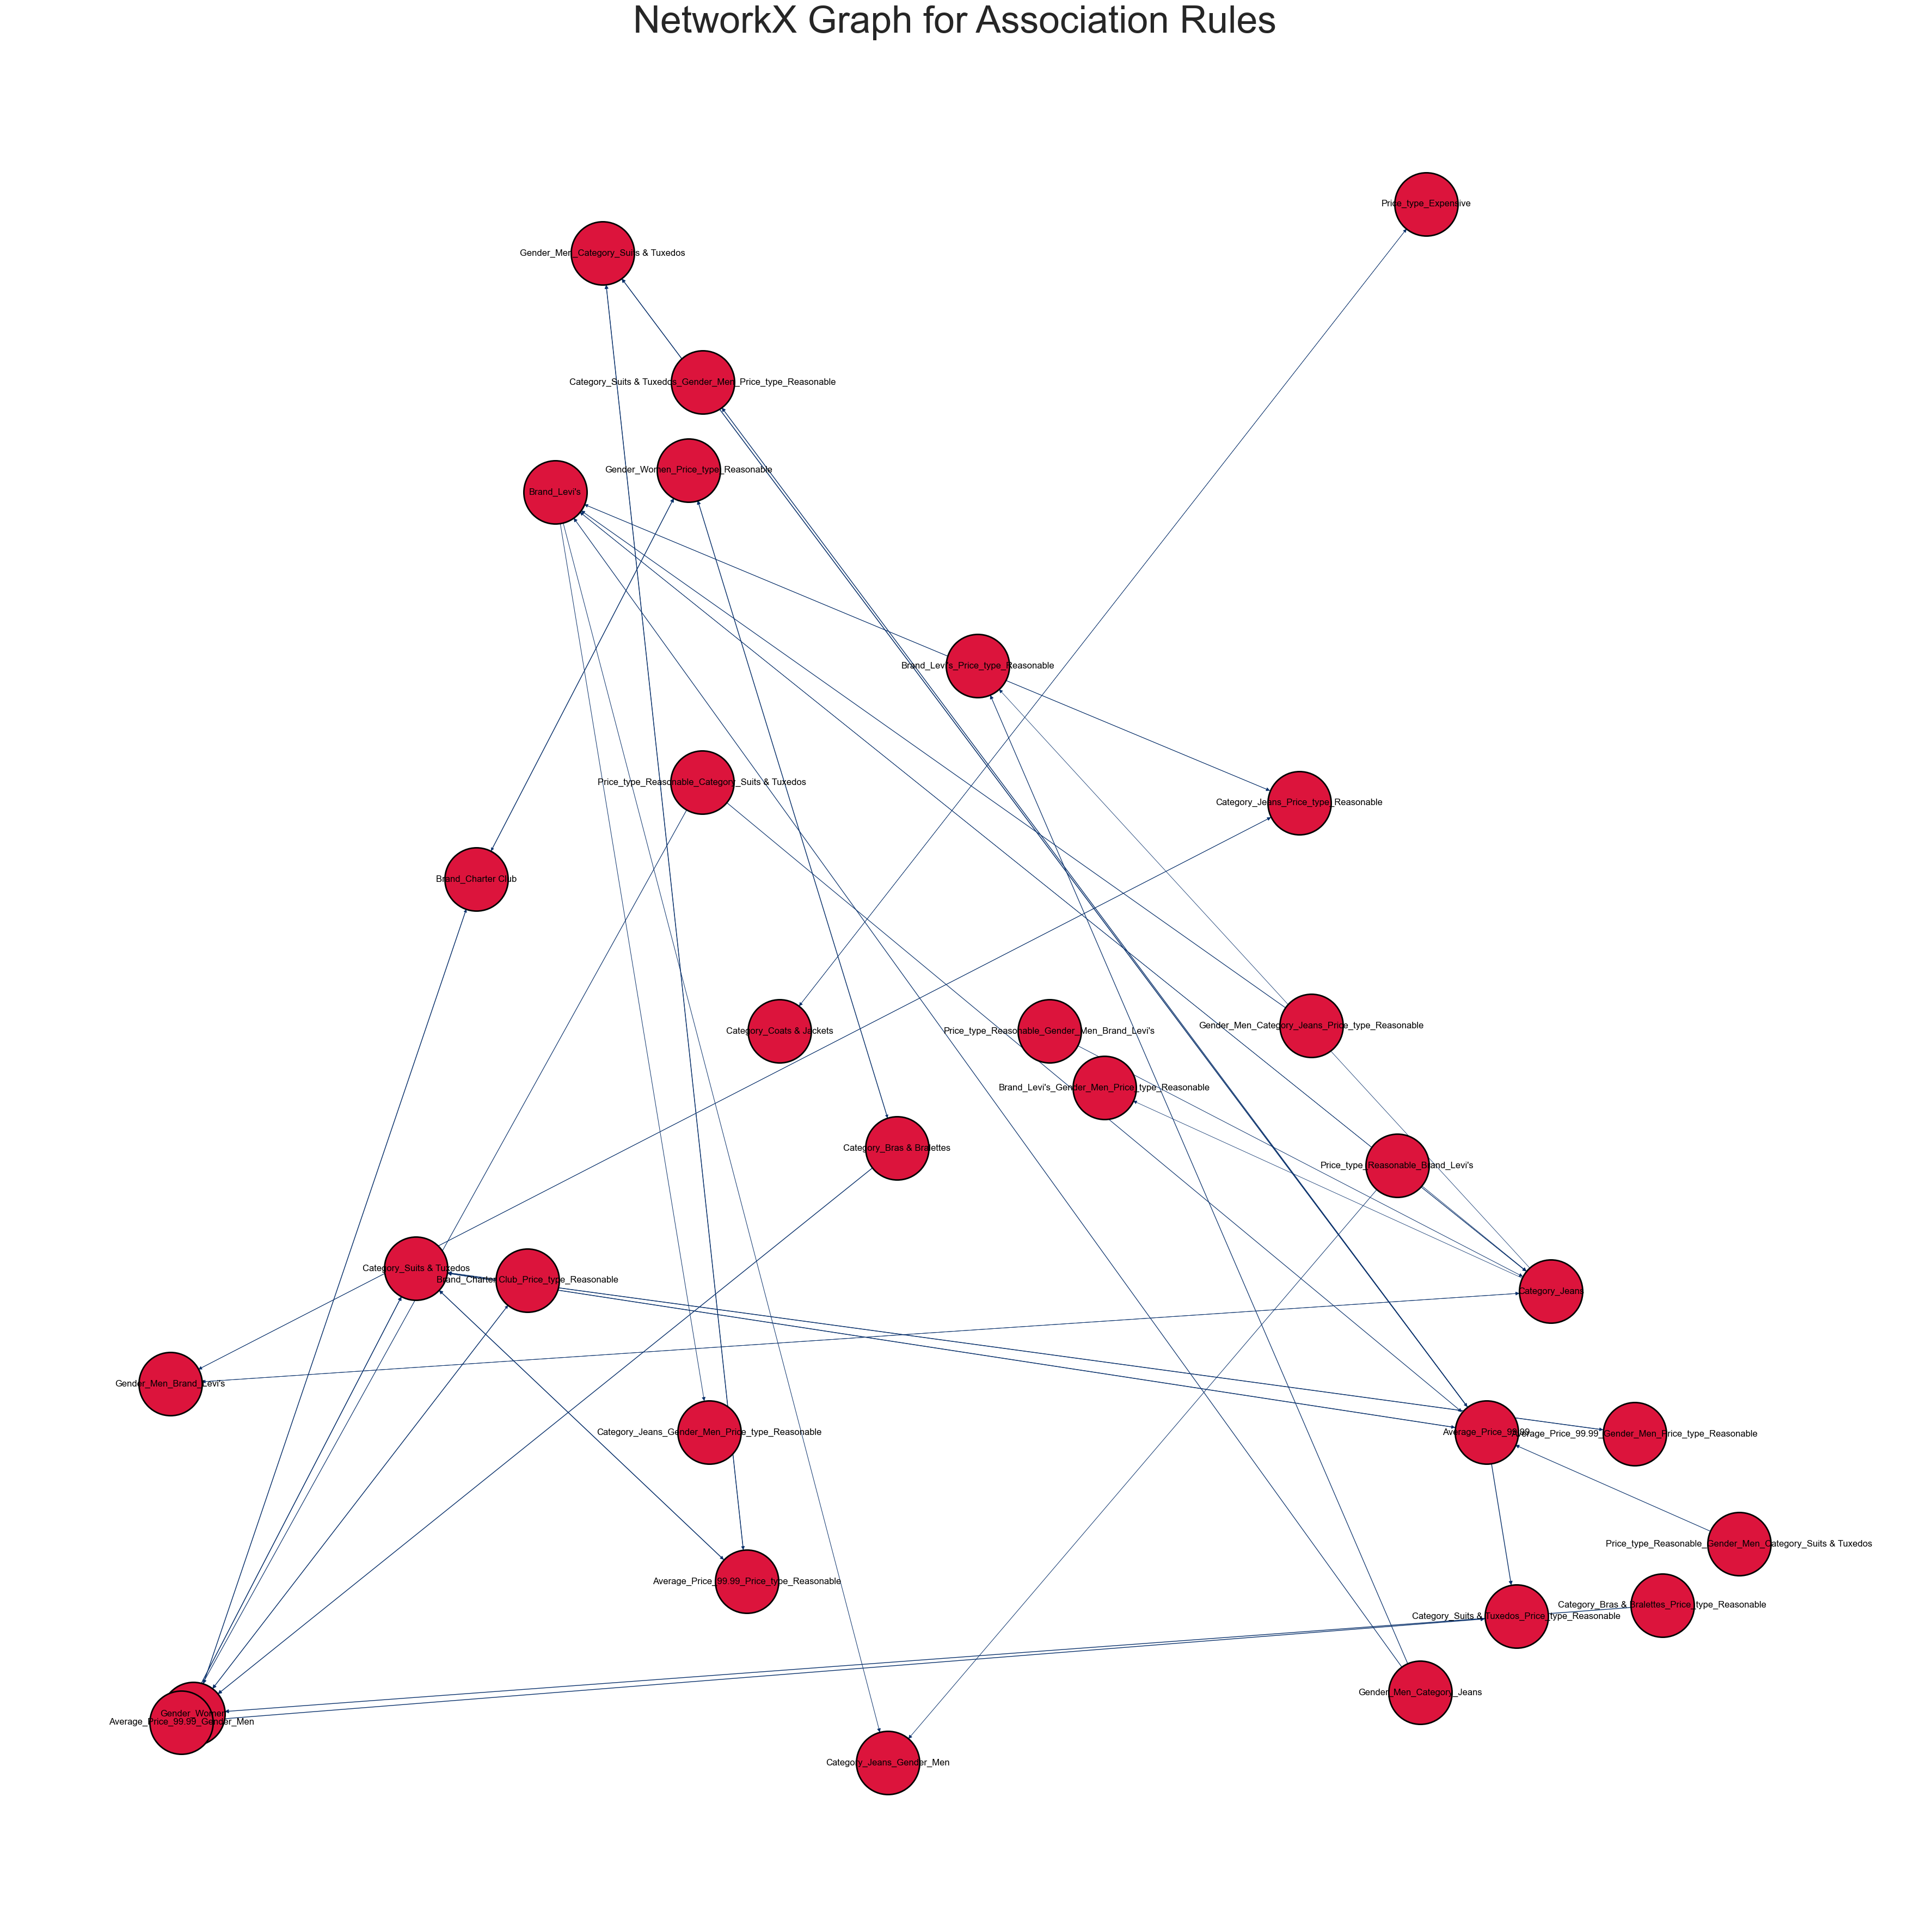

In [28]:
G = convert_to_network(result_df)
plot_network(G)

# Conclusion
- There are a lot of interesting relations from the rules than can be seen from the network graph.
-	Suppose the category is dresses, the price type is expensive, the gender is women and the rating is 4.0
- Suppose the gender is man, the category is sunglasses, price type is expensive.
- There are many more conclusions that can be drawn by seeing the graph.